# Physics 641 - Homework 4

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024

### Problem 4.48: Qualitative behavior of the heat capacity for a simple system.

#### Consider a system of $N$ noninteracting, distinguishable particles.  Each particle can be in one of three states with energies $0$, $\Delta$, and $10\Delta$.  Without doing an explicit calculation, sketch the temperature dependence of the heat capacity.

### Problem 4.50: One-dimensional harmonic oscillators in equilibrium with a heat bath.

#### (a) Calculate the specific heat of the one-dimensional harmonic oscillator as a function of temperature (see Example 4.3).

#### (b) Plot the $T-$dependence of the mean energy per particle $\overline{E}/N$ and the heat capacity $C_V$.  Show that $\overline{E}/N\rightarrow k_BT=1/\beta$ at high temperatures for which $k_BT=1/\beta>>\hbar\omega$.  This result corresponds to the classical limit and will be shown in Section 6.2.1 to be an example of the equipartition theorem.  In this limit, the energy $k_BT$ is large in comparison to $\hbar\omega$, the separation between energy levels.  Hint: expand the exponential function in 4.132.

#### (c) Show that at low temperatures for which $\hbar\omega>>k_BT=1/\beta$, $\overline{E}/N\rightarrow\hbar\omega\left(\frac{1}{2}+e^{-\beta\hbar\omega}\right)$.  What is the value of the heat capacity?  Why is the latter so much smaller than it is in the high temperature limit?  Why is this behavior different from that of a two-state system?

#### (d) Verify that $S\rightarrow0$ as $T\rightarrow0$ in agreement with the third law of thermodynamics and that at high $T$, $S\rightarrow kN\ln(k_BT/\hbar\omega)$.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

### Problem 4.48: Qualitative behavior of the heat capacity for a simple system.

In [2]:
'''Define constants'''
kB = 1     #Boltzmann's constant [J / K]
delta = 1  #arbitrary energy level of system [J]

'''Defining a function to calculate the heat capacity'''
def heat_capacity(B: float):
    x = B * delta
    Cv_NkB = (x**2) * ((np.exp(-x) + 100 * np.exp(-10 * x) + 81 * np.exp(-11 * x)) / 1 + np.exp(-x) + np.exp(-10 * x))
    return Cv_NkB

#### Consider a system of $N$ noninteracting, distinguishable particles.  Each particle can be in one of three states with energies $0$, $\Delta$, and $10\Delta$.  Without doing an explicit calculation, sketch the temperature dependence of the heat capacity.  $\newline$ Note that $$C_V=Nk_B(\beta\Delta)^2\frac{e^{-\beta\Delta}+100e^{-10\beta\Delta}+81e^{-11\beta\Delta}}{(1+e^{-\beta\Delta}+e^{-10\beta\Delta})^2}.$$

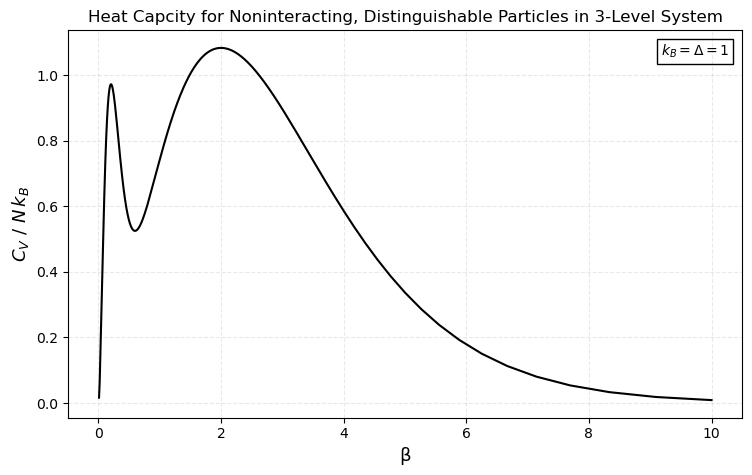

In [3]:
'''Choose temperatures for kT >> delta and kT << delta'''
temps = np.linspace(0.1, 100, 10000)
betas = [1 / (kB * T) for T in temps]

'''Calculate data'''
Cv = [heat_capacity(B) for B in betas]

'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.tight_layout(pad = 3)
ax.set_xlabel('\u03B2', fontsize = 13)
ax.set_ylabel('$C_V\ /\ N\,k_B$', fontsize = 13)
ax.set_title('Heat Capcity for Noninteracting, Distinguishable Particles in 3-Level System')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
ax.plot(betas, Cv, linestyle = 'solid', color = 'black')
ax.annotate('$k_B=\Delta=1$', xy = (0.93, 0.945), xycoords = 'axes fraction',
              ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/HeatCapacity_3Level_HotColdLimits.png', bbox_inches = 'tight')

### Problem 4.50: One-dimensional harmonic oscillators in equilibrium with a heat bath.

In [4]:
'''Natural Units'''
h = 1   #Planck's constant [J * s]
w = 1   #angular frequency [rad / s]
kB = 1  #Boltzmann's constant [J / K]

'''Defining a function to calculate the mean energy per particle'''
def mean_energy(B: float):
    E_N = (0.5 * h * w) + (h * w / (np.exp(B * h * w) - 1))
    return E_N

'''Defining a function to calculate the heat capacity'''
def heat_capacity(B: float):
    Cv_NkB = (B * h * w)**2 * (np.exp(B * h * w) / (np.exp(B * h * w) - 1)**2)
    return Cv_NkB

'''Defining a function to calculate the entropy'''
def entropy(B: float):
    S_NkB = (B * h * w / (np.exp(B * h * w) - 1)) - np.log(1 - np.exp(-B * h * w))
    return S_NkB

#### (a) Calculate the specific heat of the one-dimensional harmonic oscillator as a function of temperature (see Example 4.3).

##### Note that the mean energy per particle $\overline{E}/N$ and the heat capacity $C_V$ were found to be $$\frac{\overline{E}}{N}=\frac{1}{2}\hbar\omega+\frac{\hbar\omega}{e^{\beta\hbar\omega}-1}\ \text{ and }\ C_V=Nk_B(\beta\hbar\omega)^2\frac{e^{\beta\hbar\omega}}{(e^{\beta\hbar\omega}-1)^2}.$$

#### (b) Plot the $T-$dependence of the mean energy per particle $\overline{E}/N$ and the heat capacity $C_V$.  Show that $\overline{E}/N\rightarrow kT=1/\beta$ at high temperatures for which $kT=1/\beta>>\hbar\omega$.  This result corresponds to the classical limit and will be shown in Section 6.2.1 to be an example of the equipartition theorem.  In this limit, the energy $kT$ is large in comparison to $\hbar\omega$, the separation between energy levels.  Hint: expand the exponential function in 4.132.

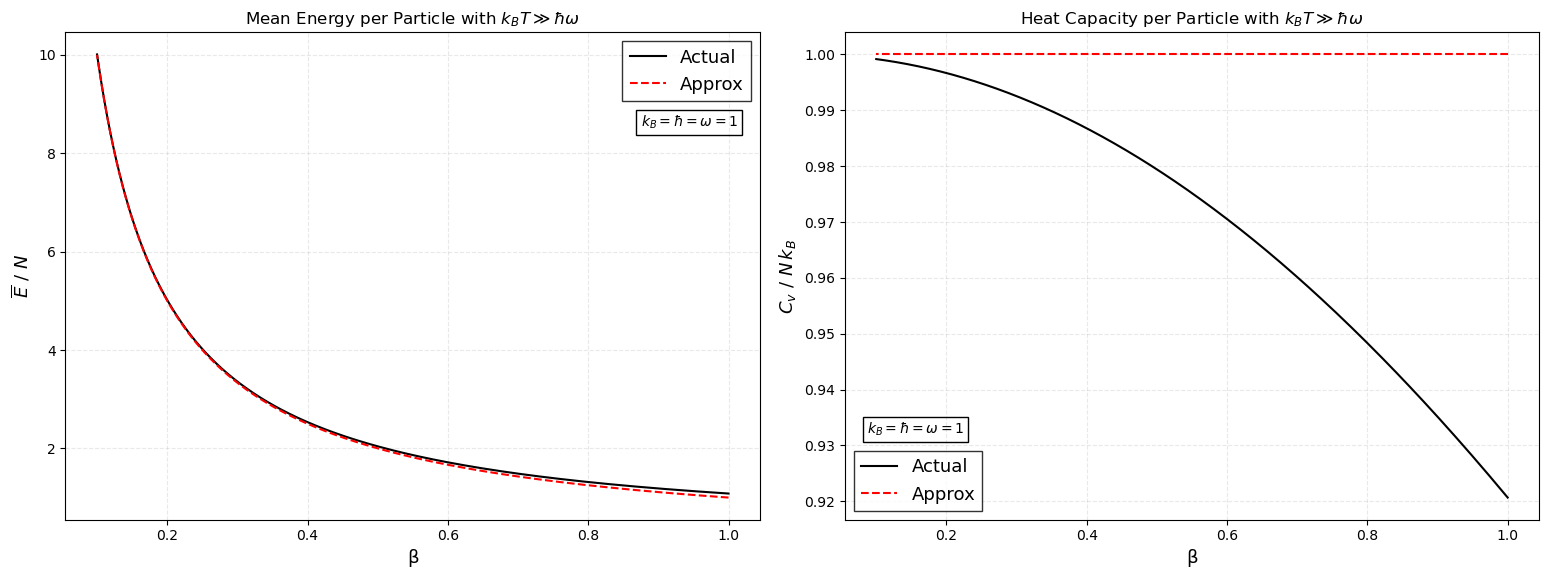

In [5]:
'''Choose temperatures for kT >> hw'''
temps_hot = np.linspace(1, 10, 1000)
betas_hot = [1 / (kB * T) for T in temps_hot]

'''Calculate data'''
actual_EN_hot = [mean_energy(B) for B in betas_hot]
approx_EN_hot = [1 / B for B in betas_hot]
actual_Cv_hot = [heat_capacity(B) for B in betas_hot]
approx_Cv_hot = [1 for B in betas_hot]

'''Create figure and plots results'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6), gridspec_kw = {'width_ratios': [1, 1]})
fig.tight_layout(pad = 3)
for ax in [ax1, ax2]:
    ax.set_xlabel('\u03B2', fontsize = 13)
    ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
    
'''First figure --> E / N'''
ax1.set_ylabel('$\overline{E}\ /\ N$', fontsize = 13)
ax1.set_title('Mean Energy per Particle with $k_BT\gg\hbar\omega$')
ax1.plot(betas_hot, actual_EN_hot, linestyle = 'solid', color = 'black', label = 'Actual')
ax1.plot(betas_hot, approx_EN_hot, linestyle = 'dashed', color = 'red', label = 'Approx')
ax1.annotate('$k_B=\hbar=\omega=1$', xy = (0.898, 0.815), xycoords = 'axes fraction',
              ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
legend1 = ax1.legend(loc = 'upper right', prop = {'size': 13}, fancybox = False)
frame1 = legend1.get_frame()
frame1.set_facecolor('white')
frame1.set_edgecolor('black')
frame1.set_linewidth(1)

'''First figure --> Cv / N kB'''
ax2.set_ylabel('$C_v\ /\ N\,k_B$', fontsize = 13)
ax2.set_title('Heat Capacity per Particle with $k_BT\gg\hbar\omega$')
ax2.plot(betas_hot, actual_Cv_hot, linestyle = 'solid', color = 'black', label = 'Actual')
ax2.plot(betas_hot, approx_Cv_hot, linestyle = 'dashed', color = 'red', label = 'Approx')
ax2.annotate('$k_B=\hbar=\omega=1$', xy = (0.102, 0.185), xycoords = 'axes fraction',
              ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
legend2 = ax2.legend(loc = 'lower left', prop = {'size': 13}, fancybox = False)
frame2 = legend2.get_frame()
frame2.set_facecolor('white')
frame2.set_edgecolor('black')
frame2.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Energy_HeatCapacity_HotLimit.png', bbox_inches = 'tight')

##### We see that $k_BT=1/\beta$ is a very good approximation of the mean energy per particle at high tempertures.  Similarly, we find that the heat capacity also approaches $Nk_B$ at high temperatures as expected.

#### (c) Show that at low temperatures for which $\hbar\omega>>kT=1/\beta$, $\overline{E}/N=\hbar\omega\left(\frac{1}{2}+e^{-\beta\hbar\omega}\right)$.  What is the value of the heat capacity?  Why is the latter so much smaller than it is in the high temperature limit?  Why is this behavior different from that of a two-state system?

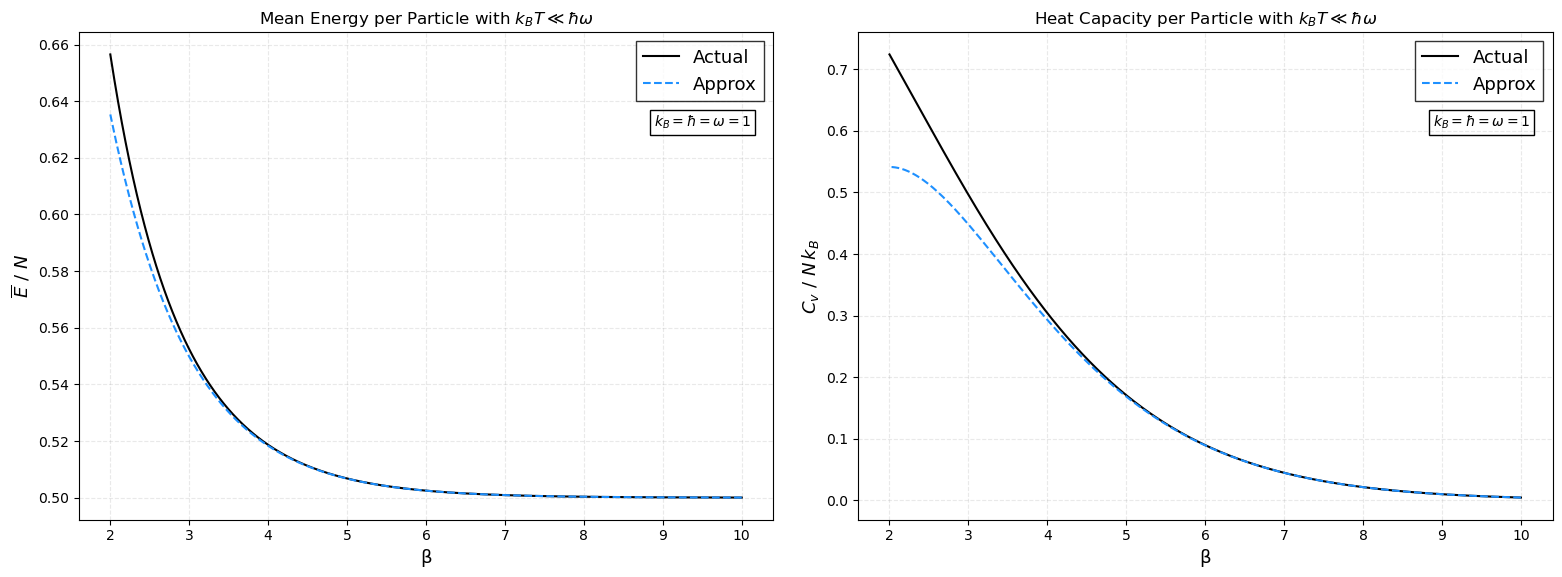

In [6]:
'''Choose temperatures for kT << hw'''
temps_cold = np.linspace(0.1, 0.5, 1000)
betas_cold = [1 / (kB * T) for T in temps_cold]

'''Calculate data'''
actual_EN_cold = [mean_energy(B) for B in betas_cold]
approx_EN_cold = [h * w * (0.5 + np.exp(-B * h * w)) for B in betas_cold]
actual_Cv_cold = [heat_capacity(B) for B in betas_cold]
approx_Cv_cold = [(B * h * w)**2 / np.exp(B * h * w) for B in betas_cold]

'''Create figure and plots results'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6), gridspec_kw = {'width_ratios': [1, 1]})
fig.tight_layout(pad = 3)
for ax in [ax1, ax2]:
    ax.set_xlabel('\u03B2', fontsize = 13)
    ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
    
'''First figure --> E / N'''
ax1.set_ylabel('$\overline{E}\ /\ N$', fontsize = 13)
ax1.set_title('Mean Energy per Particle with $k_BT\ll\hbar\omega$')
ax1.plot(betas_cold, actual_EN_cold, linestyle = 'solid', color = 'black', label = 'Actual')
ax1.plot(betas_cold, approx_EN_cold, linestyle = 'dashed', color = 'dodgerblue', label = 'Approx')
ax1.annotate('$k_B=\hbar=\omega=1$', xy = (0.898, 0.815), xycoords = 'axes fraction',
              ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
legend1 = ax1.legend(loc = 'upper right', prop = {'size': 13}, fancybox = False)
frame1 = legend1.get_frame()
frame1.set_facecolor('white')
frame1.set_edgecolor('black')
frame1.set_linewidth(1)

'''First figure --> Cv / N kB'''
ax2.set_ylabel('$C_v\ /\ N\,k_B$', fontsize = 13)
ax2.set_title('Heat Capacity per Particle with $k_BT\ll\hbar\omega$')
ax2.plot(betas_cold, actual_Cv_cold, linestyle = 'solid', color = 'black', label = 'Actual')
ax2.plot(betas_cold, approx_Cv_cold, linestyle = 'dashed', color = 'dodgerblue', label = 'Approx')
ax2.annotate('$k_B=\hbar=\omega=1$', xy = (0.898, 0.815), xycoords = 'axes fraction',
              ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
legend2 = ax2.legend(loc = 'upper right', prop = {'size': 13}, fancybox = False)
frame2 = legend2.get_frame()
frame2.set_facecolor('white')
frame2.set_edgecolor('black')
frame2.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Energy_HeatCapacity_ColdLimit.png', bbox_inches = 'tight')

##### We see that $\hbar\omega\left(1/2+e^{-\beta\hbar\omega}\right)$ is a very good approximation of the mean energy per particle at low tempertures.  Similarly, we find that the heat capacity also approaches $Nk_B(\beta\hbar\omega)^2/e^{\beta\hbar\omega}$ at low temperatures as expected.

#### (d) Verify that $S\rightarrow0$ as $T\rightarrow0$ in agreement with the third law of thermodynamics and that at high $T$, $S\rightarrow kN\ln(kT/\hbar\omega)$.

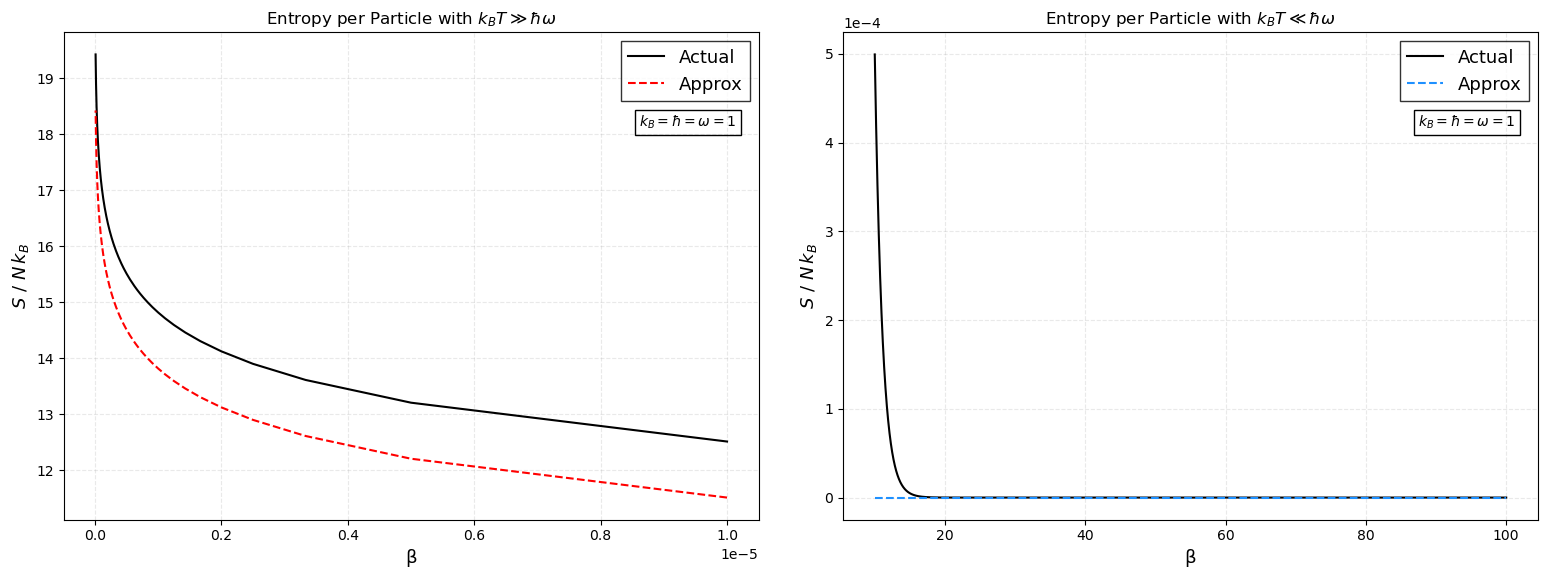

In [7]:
'''Choose temperatures for T -> inf and T -> 0'''
temps_inf = np.linspace(100000, 100000000, 1000)
betas_inf = [1 / (kB * T) for T in temps_inf]
temps_zero = np.linspace(0.1, 0.01, 1000)
betas_zero = [1 / (kB * T) for T in temps_zero]

'''Calculate data'''
actual_S_hot = [entropy(B) for B in betas_inf]
approx_S_hot = [np.log(1 / (B * h * w)) for B in betas_inf]
actual_S_cold = [entropy(B) for B in betas_zero]
approx_S_cold = [0 for B in betas_zero]

'''Create figure and plots results'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6), gridspec_kw = {'width_ratios': [1, 1]})
fig.tight_layout(pad = 3)
for ax in [ax1, ax2]:
    ax.set_xlabel('\u03B2', fontsize = 13)
    ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
    
'''First figure --> S / N kB Hot'''
ax1.set_ylabel('$S\ /\ N\,k_B$', fontsize = 13)
ax1.set_title('Entropy per Particle with $k_BT\gg\hbar\omega$')
ax1.plot(betas_inf, actual_S_hot, linestyle = 'solid', color = 'black', label = 'Actual')
ax1.plot(betas_inf, approx_S_hot, linestyle = 'dashed', color = 'red', label = 'Approx')
ax1.annotate('$k_B=\hbar=\omega=1$', xy = (0.898, 0.815), xycoords = 'axes fraction',
              ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
legend1 = ax1.legend(loc = 'upper right', prop = {'size': 13}, fancybox = False)
frame1 = legend1.get_frame()
frame1.set_facecolor('white')
frame1.set_edgecolor('black')
frame1.set_linewidth(1)

'''First figure --> S / N kB Cold'''
ax2.set_ylabel('$S\ /\ N\,k_B$', fontsize = 13)
ax2.set_title('Entropy per Particle with $k_BT\ll\hbar\omega$')
ax2.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
ax2.plot(betas_zero, actual_S_cold, linestyle = 'solid', color = 'black', label = 'Actual')
ax2.plot(betas_zero, approx_S_cold, linestyle = 'dashed', color = 'dodgerblue', label = 'Approx')
ax2.annotate('$k_B=\hbar=\omega=1$', xy = (0.898, 0.815), xycoords = 'axes fraction',
              ha = 'center', va = 'center', bbox = dict(boxstyle = 'square', edgecolor = 'black', facecolor = 'none'))
legend2 = ax2.legend(loc = 'upper right', prop = {'size': 13}, fancybox = False)
frame2 = legend2.get_frame()
frame2.set_facecolor('white')
frame2.set_edgecolor('black')
frame2.set_linewidth(1)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Entropy_HotColdLimits.png', bbox_inches = 'tight')

##### We see that $Nk_B\ln(1/\beta\hbar\omega)$ is a very good approximation of the entropy per particle at high tempertures.  Similarly, we find that the entropy per particle approaches $0$ at low temperatures as expected.